In [18]:
import matplotlib.pyplot as plt

##Set PATH
path='/Users/louise/Documents/source/LogFileReader/logging_files_may19/'
fileKinect = 'loggerFile_kinect.txt'

#contains the file broken into a list 
fileListKinect=[]

f2 = open(path+fileKinect, 'r') #Open file in read mode
print('Displaying: ', fileKinect)
for num2, line in enumerate(f2):
    fileListKinect.append(line.split()) #make the list from the file
    print('Line: ', line.split())
f2.close()

Displaying:  loggerFile_kinect.txt
Line:  ['NewSESSION', 'Mon', 'May', '8', '09:23:02', '2017']
Line:  ['lightsON', 'Mon', 'May', '8', '09:23:02', '2017']
Line:  ['kinectTrackON', 'Mon', 'May', '8', '09:23:03', '2017']
Line:  ['kinectTrack', '0.243487', '0.294479', 'Mon', 'May', '8', '09:23:22', '2017']
Line:  ['kinectTrack', '0.243487', '0.294479', 'Mon', 'May', '8', '09:23:22', '2017']
Line:  ['kinectTrack', '0.216546', '0.326869', 'Mon', 'May', '8', '09:23:22', '2017']
Line:  ['kinectTrack', '0.213338', '0.344524', 'Mon', 'May', '8', '09:23:22', '2017']
Line:  ['kinectTrack', '0.217308', '0.351095', 'Mon', 'May', '8', '09:23:22', '2017']
Line:  ['kinectTrack', '0.214026', '0.344013', 'Mon', 'May', '8', '09:23:22', '2017']
Line:  ['kinectTrack', '0.215156', '0.323294', 'Mon', 'May', '8', '09:23:22', '2017']
Line:  ['kinectTrack', '0.224384', '0.295312', 'Mon', 'May', '8', '09:23:22', '2017']
Line:  ['kinectTrack', '0.242929', '0.272852', 'Mon', 'May', '8', '09:23:22', '2017']
Line:  

In [19]:
# look for how many times the lights turned on/off (kinect)
LightON = 0
LightOFF = 0

if fileKinect.find('kinect') !=-1:
    for num6, strline in enumerate(fileListKinect):
        if len(strline) == 0:
            # do nothing
            x = 1
            
        elif 'lightsON' in strline:
            LightON = LightON + 1
            print(strline[0], 'was turned ON', strline[1], 'at', strline[4])
            
        elif 'lightsOFF' in strline:
            LightOFF = LightOFF + 1
            print(strline[0], 'was turned OFF', strline[1], 'at', strline[4])

print('Lights ON: ', LightON)
print('Lights OFF: ', LightOFF)

lightsON was turned ON Mon at 09:23:02
lightsON was turned ON Tue at 09:00:48
lightsOFF was turned OFF Tue at 09:00:51
lightsON was turned ON Tue at 09:00:53
lightsOFF was turned OFF Tue at 09:24:20
lightsON was turned ON Tue at 09:33:18
lightsOFF was turned OFF Tue at 09:39:19
lightsON was turned ON Tue at 10:40:50
lightsON was turned ON Thu at 07:48:03
lightsOFF was turned OFF Thu at 07:48:11
lightsON was turned ON Thu at 07:48:34
lightsOFF was turned OFF Thu at 07:51:06
lightsON was turned ON Thu at 07:51:11
lightsOFF was turned OFF Thu at 07:52:12
lightsON was turned ON Thu at 07:52:43
Lights ON:  9
Lights OFF:  6


In [20]:
# look for how many times the lights were moved (kinect)
LightMoved = 0
lastResult = 0
lastDay = 0
lastTime = 0

listOfMovementsKinectX = []
listOfMovementsKinectY = []
listOfMovementsKinectT = []
tempListX = []
tempListY = []
tempListT = []

if fileKinect.find('kinect') !=-1:
    for num7, strline in enumerate(fileListKinect):
        if len(strline) == 0:
            # do nothing
            x = 1
        elif 'kinectTrackON' in strline:
            print('tracking ON')
        elif 'kinectTrackOFF' in strline:
            print('tracking OFF')
        # ['kinectTrack', '0.620247', '0.386224', 'Wed', 'Apr', '5', '10:38:01', '2017']
        elif 'kinectTrack' in strline:
            t = strline[6]
            (h, m, s) = t.split(':')
            result = int(h) * 3600 + int(m) * 60 + int(s)
            #print('time in seconds: ', result)
            #print('moved on, day: ', strline[3], ' time: ', strline[6], ' dif: ', (result-lastTime))
            if lastTime == 0: # first time, so need to initialize variables
                lastDay = strline[3]
                lastResult = result
                lastTime = strline[6]
                print('light moved for first time in file: ', lastTime)
            elif (result - lastResult) < 20 and (result - lastResult) > -1:
                lastDay = strline[3]
                lastResult = result
                lastTime = strline[6]
                #print('still in same movement')
            else: 
                # save the list of the movedment 
                listOfMovementsKinectX.append(tempListX)
                listOfMovementsKinectY.append(tempListY)
                listOfMovementsKinectT.append(tempListT)
                # empty the lists
                tempListX = [] 
                tempListY = []
                tempListT = []
                # count at end of movement
                LightMoved = LightMoved + 1
                print('light moved ++: ', (result-lastResult), ' day: ', strline[3], ' time: ', strline[6])
                lastDay = strline[3]
                lastResult = result
                lastTime = strline[6]
            tempListX.append(strline[1])
            tempListY.append(strline[2])
            tempListT.append(result)
            
listOfMovementsKinectX.append(tempListX)
listOfMovementsKinectY.append(tempListY)
listOfMovementsKinectT.append(tempListT)

print('light moved ++: ', lastResult, ' day: ', lastDay, ' time: ', lastTime)
print('Lights moved: ', LightMoved+1) # will not have counted last one
print('Length of movement list: ', len(listOfMovementsKinectX))

tracking ON
light moved for first time in file:  09:23:22
tracking ON
light moved ++:  -1351  day:  Tue  time:  09:00:56
tracking OFF
tracking ON
light moved ++:  5989  day:  Tue  time:  10:40:56
tracking ON
light moved ++:  -10328  day:  Thu  time:  07:48:52
tracking OFF
tracking ON
tracking OFF
tracking ON
light moved ++:  43  day:  Thu  time:  07:50:50
tracking OFF
tracking ON
tracking OFF
tracking ON
light moved ++:  30  day:  Thu  time:  07:51:36
tracking OFF
tracking ON
tracking OFF
tracking ON
light moved ++:  50  day:  Thu  time:  07:52:54
tracking OFF
tracking ON
light moved ++:  26  day:  Thu  time:  07:53:52
tracking OFF
tracking ON
tracking OFF
tracking ON
light moved ++:  26  day:  Thu  time:  07:54:51
tracking OFF
tracking ON
light moved ++:  21  day:  Thu  time:  07:55:25
tracking OFF
tracking ON
tracking OFF
tracking ON
light moved ++:  28603  day:  Thu  time:  07:56:43
Lights moved:  10
Length of movement list:  10


i:  0
Length X:  147
Length Y:  147
Length T:  147


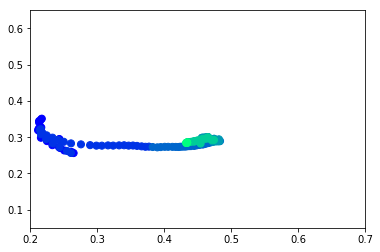

i:  1
Length X:  330
Length Y:  330
Length T:  330


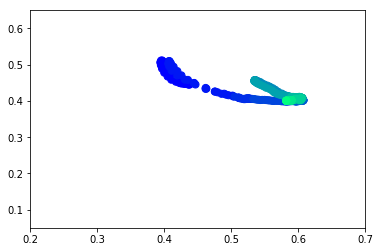

i:  2
Length X:  112
Length Y:  112
Length T:  112


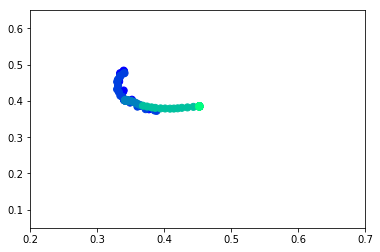

i:  3
Length X:  1108
Length Y:  1108
Length T:  1108


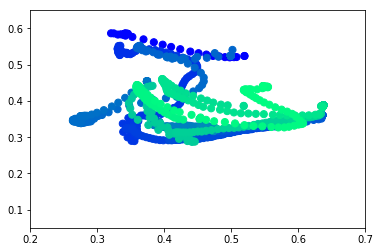

i:  4
Length X:  183
Length Y:  183
Length T:  183


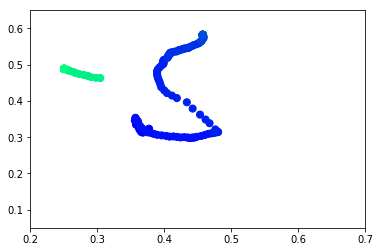

i:  5
Length X:  722
Length Y:  722
Length T:  722


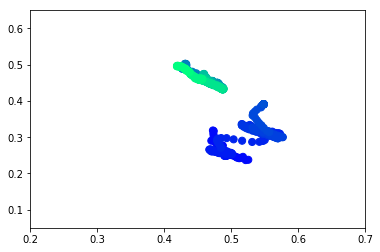

i:  6
Length X:  688
Length Y:  688
Length T:  688


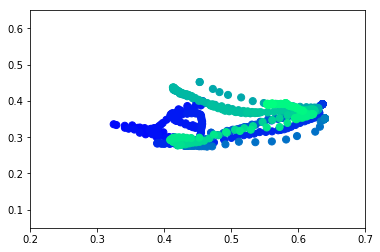

i:  7
Length X:  574
Length Y:  574
Length T:  574


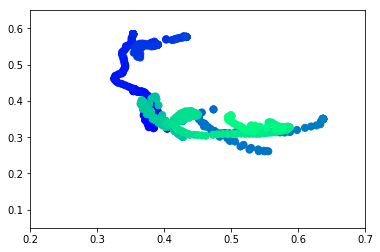

i:  8
Length X:  253
Length Y:  253
Length T:  253


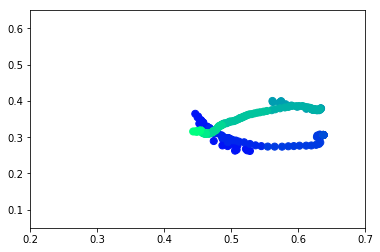

i:  9
Length X:  1836
Length Y:  1836
Length T:  1836


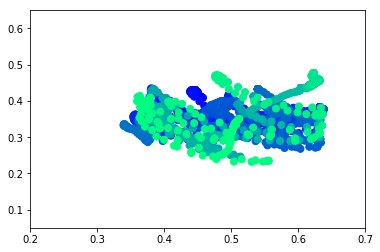

In [21]:
if fileKinect.find('kinect') !=-1:
    for i, movementX in enumerate(listOfMovementsKinectX):
        print('i: ', i)
        print('Length X: ', len(listOfMovementsKinectX[i]))
        print('Length Y: ', len(listOfMovementsKinectY[i]))
        print('Length T: ', len(listOfMovementsKinectT[i]))
        plt.scatter(listOfMovementsKinectX[i], listOfMovementsKinectY[i], c=listOfMovementsKinectT[i], s=50, cmap='winter')
        axes = plt.gca()
        axes.set_xlim([0.2,0.7])
        axes.set_ylim([0.05,0.65])
        plt.show()